In [17]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import AutoMinorLocator
from matplotlib import rc
plt.style.use('classic')
rc('font', family='serif', weight='ultralight')
rc('figure', facecolor='w')
from mpl_toolkits.mplot3d import Axes3D
from astropy.io import fits, ascii
from astropy.table import Table
import astropy.units as u
import astropy.coordinates as coord
import os, math

### Read in samples

In [ ]:
allstar = fits.open('/home/jess/Desktop/Research/data/apogee_data/allStar-l31c.2.fits')

In [769]:
len(mann)

67

In [5]:
mann = pd.read_csv('/home/jess/Desktop/Research/Mdwarf_project/cannon_runs/raw_data_files/mann_87_APOGEE_x_Gaia.csv')
mann['BP_RP'] = mann['phot_bp_mean_mag'] - mann['phot_rp_mean_mag']
mann['J_K'] = mann['J'] - mann['K']
mann['G_ABS'] = mann['phot_g_mean_mag'] + 5*np.log10(mann['parallax'])-10
mann['K_ABS'] = mann['K'] + 5*np.log10(mann['parallax'])-10
mann['DIST'] = 1/np.array(mann['parallax'])

mann_results = pd.read_csv('/home/jess/Desktop/Research/Mdwarf_project/cannon_runs/train_mann/results/test_results.csv')

In [38]:
pms_cat = fits.open('/home/jess/Desktop/Research/surveys/catalogs/APOGEE_PMS_catalog.fits')
pms_ID = np.array(pms_cat[1].data['2MASS'])

elbadry_cat = pd.read_csv('/home/jess/Desktop/Research/surveys/catalogs/APOGEE_ElBadry_binaries.csv')
elbadry_ID = elbadry_cat['APOGEE_ID']
skinner_ID = ['2M00372323+4950469','2M03122509+0021585','2M03330508+5101297','2M03393700+4531160',\
              '2M04281703+5521194','2M04373881+4650216','2M04595013+3638144','2M05421216+2224407',\
              '2M05504191+3525569','2M06115599+3325505','2M06125378+2343533','2M06213904+3231006',\
              '2M06561894-0835461','2M07063543+0219287','2M07444028+7946423','2M08100405+3220142',\
              '2M08351992+1408333','2M10331367+3409120','2M10423925+1944404','2M10464238+1626144',\
              '2M10520326+0032383','2M11081979+4751217','2M12045611+1728119','2M12193796+2634445',\
              '2M12214070+2707510','2M12260547+2644385','2M12260848+2439315','2M14545496+4108480',\
              '2M14551346+4128494','2M14562809+1648342','2M15183842-0008235','2M15192613+0153284',\
              '2M15225888+3644292','2M17204248+4205070','2M18514864+1415069','2M19081153+2839105',\
              '2M19235494+3834587','2M19433790+3225124','2M19560585+2205242','2M20474087+3343054',\
              '2M21005978+5103147','2M21234344+4419277','2M21442066+4211363','2M21451241+4225454']
bin_ID = list(set(elbadry_ID) or set(skinner_ID))

In [718]:
len(pd.read_csv('test_results/test_mann.csv'))

14827

In [730]:
test = pd.read_csv('test_results/test_mann.csv')
test['K_ABS'] = test['K'] + 5*np.log10(test['PLX'])-10
test['J_K'] = test['J'] - test['K']

### Remove known binaries and pre-MS stars

In [731]:
sel = test
for ID in list(set(bin_ID) or set(pms_ID)):
    sel = sel[sel['ID'] != ID]
    
cuts = test.set_index('ID').subtract(sel.set_index('ID'), fill_value=0)

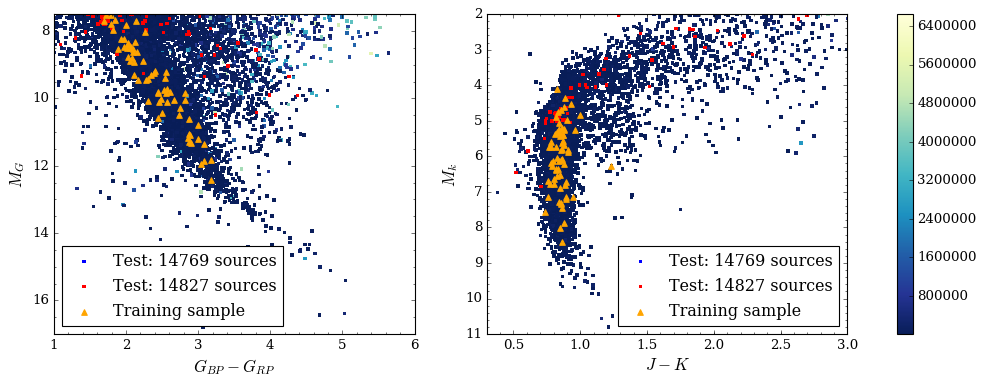

In [732]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=[16,5])

ax1.scatter(sel['BP_RP'], sel['G_ABS'], c=sel['CHI'], cmap='YlGnBu_r', edgecolor='none', s=10, marker='s', \
                 label='Test: %s sources'%(len(sel)))
ax1.scatter(cuts['BP_RP'], cuts['G_ABS'], c='r', edgecolor='none', s=10, marker='s', \
                 label='Test: %s sources'%(len(cuts)))
ax1.scatter(mann['BP_RP'], mann['G_ABS'], color='orange', marker='^', label='Training sample', s=25)
ax1.set_xlabel(r'$G_{BP} - G_{RP}$', fontsize=15)
ax1.set_ylabel(r'$M_{G}$', fontsize=15)
ax1.set_ylim(17,7.5)
ax1.set_xlim(1,6)
ax1.legend(loc='lower left', scatterpoints=1)
ax1.minorticks_on()

pl = ax2.scatter(sel['J_K'], sel['K_ABS'], c=sel['CHI'], cmap='YlGnBu_r', edgecolor='none', s=10, marker='s', \
                 label='Test: %s sources'%(len(sel)))
ax2.scatter(cuts['J_K'], cuts['K_ABS'], c='r', edgecolor='none', s=10, marker='s', \
                 label='Test: %s sources'%(len(cuts)))
ax2.scatter(mann['J_K'], mann['K_ABS'], color='orange', marker='^', label='Training sample', s=25)
ax2.set_xlabel(r'$J-K$', fontsize=15)
ax2.set_ylabel(r'$M_{k}$', fontsize=15)
ax2.set_ylim(11,2)
ax2.set_xlim(.3,3)
ax2.legend(loc='lower right', scatterpoints=1)
ax2.minorticks_on()

cb = plt.colorbar(pl, ax=(ax1,ax2), orientation='vertical')
plt.show()

In [733]:
test = sel

### Chi^2 selection

In [734]:
chi_cut = 200000

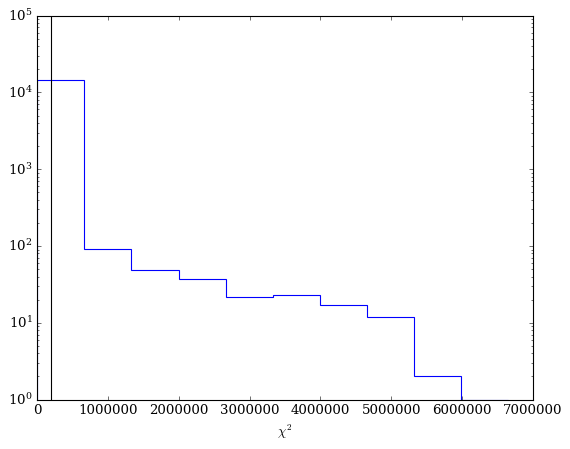

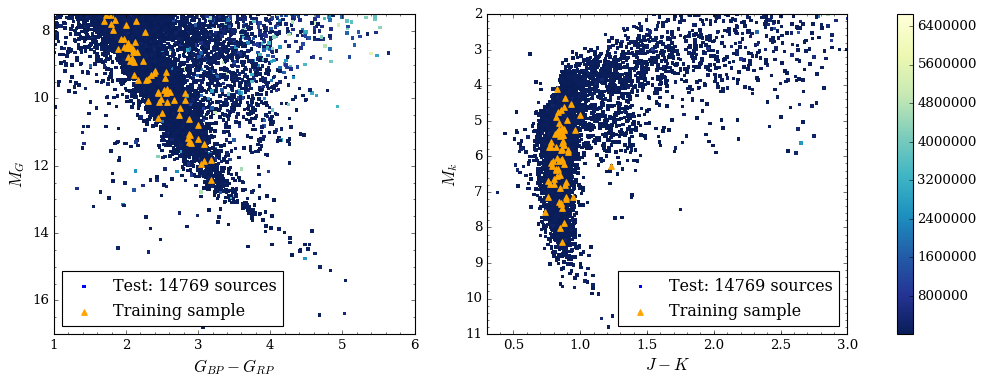

In [735]:
plt.hist(test['CHI'], histtype='step')
plt.axvline(x=chi_cut, color='k')
plt.yscale('log')
plt.xlabel(r'$\chi^2$')
plt.show()

#=====

fig, (ax1, ax2) = plt.subplots(1,2, figsize=[16,5])
ax1.scatter(test['BP_RP'], test['G_ABS'], c=test['CHI'], cmap='YlGnBu_r', edgecolor='none', s=10, marker='s', \
                 label='Test: %s sources'%(len(test)))
ax1.scatter(mann['BP_RP'], mann['G_ABS'], color='orange', marker='^', label='Training sample', s=25)
ax1.set_xlabel(r'$G_{BP} - G_{RP}$', fontsize=15)
ax1.set_ylabel(r'$M_{G}$', fontsize=15)
ax1.set_ylim(17,7.5)
ax1.set_xlim(1,6)
ax1.legend(loc='lower left', scatterpoints=1)
ax1.minorticks_on()

pl = plt.scatter(test['J_K'], test['K_ABS'], c=test['CHI'], cmap='YlGnBu_r', edgecolor='none', s=10, marker='s', \
                 label='Test: %s sources'%(len(test)))
ax2.scatter(mann['J_K'], mann['K_ABS'], color='orange', marker='^', label='Training sample', s=25)
ax2.set_xlabel(r'$J-K$', fontsize=15)
ax2.set_ylabel(r'$M_{k}$', fontsize=15)
ax2.set_ylim(11,2)
ax2.set_xlim(.3,3)
ax2.legend(loc='lower right', scatterpoints=1)
ax2.minorticks_on()

cb = plt.colorbar(pl, ax=(ax1,ax2), orientation='vertical')
plt.show()

In [736]:
test = test[test['CHI'] < chi_cut]

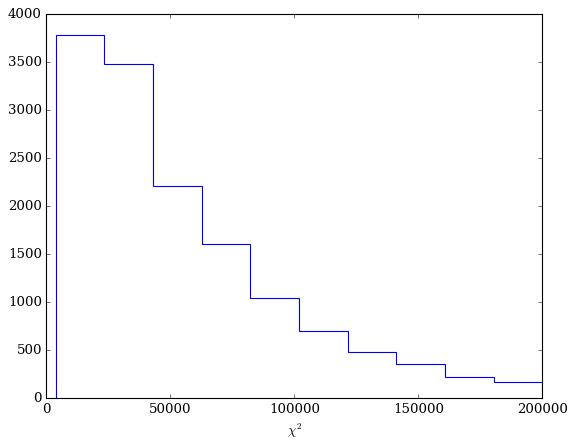

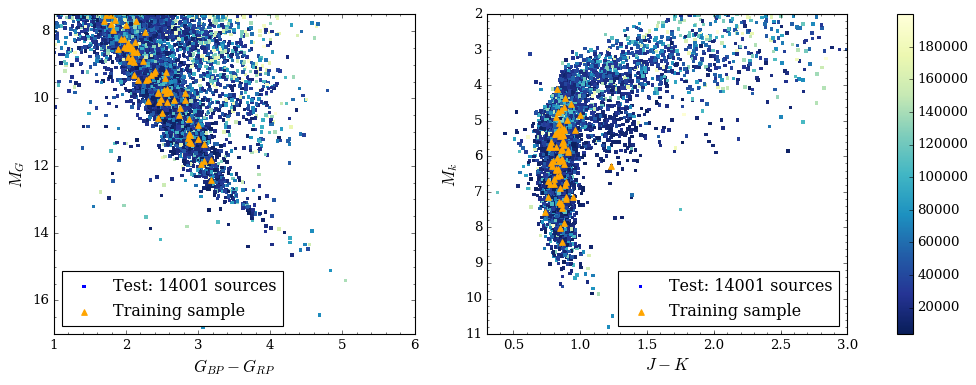

In [737]:
plt.hist(test['CHI'], histtype='step')
plt.xlabel(r'$\chi^2$')
plt.show()

#=====

fig, (ax1, ax2) = plt.subplots(1,2, figsize=[16,5])
ax1.scatter(test['BP_RP'], test['G_ABS'], c=test['CHI'], cmap='YlGnBu_r', edgecolor='none', s=10, marker='s', \
                 label='Test: %s sources'%(len(test)))
ax1.scatter(mann['BP_RP'], mann['G_ABS'], color='orange', marker='^', label='Training sample', s=25)
ax1.set_xlabel(r'$G_{BP} - G_{RP}$', fontsize=15)
ax1.set_ylabel(r'$M_{G}$', fontsize=15)
ax1.set_ylim(17,7.5)
ax1.set_xlim(1,6)
ax1.legend(loc='lower left', scatterpoints=1)
ax1.minorticks_on()

pl = plt.scatter(test['J_K'], test['K_ABS'], c=test['CHI'], cmap='YlGnBu_r', edgecolor='none', s=10, marker='s', \
                 label='Test: %s sources'%(len(test)))
ax2.scatter(mann['J_K'], mann['K_ABS'], color='orange', marker='^', label='Training sample', s=25)
ax2.set_xlabel(r'$J-K$', fontsize=15)
ax2.set_ylabel(r'$M_{k}$', fontsize=15)
ax2.set_ylim(11,2)
ax2.set_xlim(.3,3)
ax2.legend(loc='lower right', scatterpoints=1)
ax2.minorticks_on()

cb = plt.colorbar(pl, ax=(ax1,ax2), orientation='vertical')
plt.show()

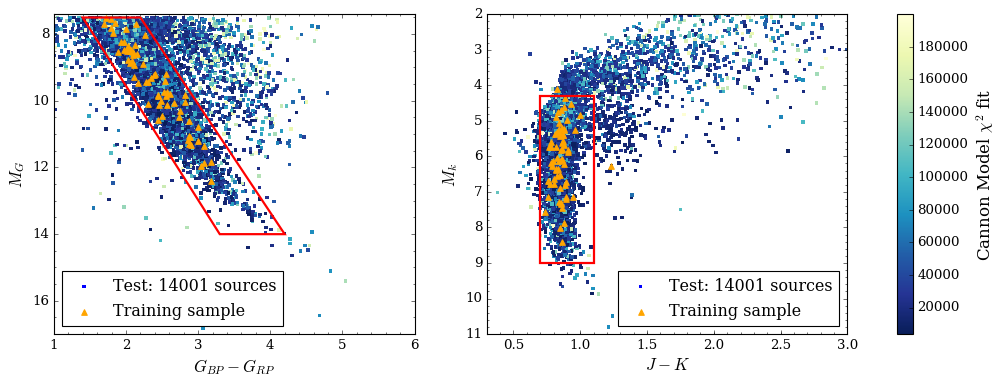

In [738]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=[16,5])

polygon = plt.Polygon(p, fill=False, color='r', linewidth=2)
ax1.add_patch(polygon)
ax1.scatter(test['BP_RP'], test['G_ABS'], c=test['CHI'], cmap='YlGnBu_r', edgecolor='none', s=10, marker='s', \
                 label='Test: %s sources'%(len(test)))
ax1.scatter(mann['BP_RP'], mann['G_ABS'], color='orange', marker='^', label='Training sample', s=25)
ax1.set_xlabel(r'$G_{BP} - G_{RP}$', fontsize=15)
ax1.set_ylabel(r'$M_{G}$', fontsize=15)
ax1.set_ylim(17,7.4)
ax1.set_xlim(1,6)
ax1.legend(loc='lower left', scatterpoints=1)
ax1.minorticks_on()

rect = plt.Rectangle((jk_cut[0], Mk_cut[0]), w, h, fill=False, color='r', linewidth=2)
ax2.add_patch(rect)
pl = ax2.scatter(test['J_K'], test['K_ABS'], c=test['CHI'], cmap='YlGnBu_r', edgecolor='none', s=10, marker='s', \
                 label='Test: %s sources'%(len(test)))
ax2.scatter(mann['J_K'], mann['K_ABS'], color='orange', marker='^', label='Training sample', s=25)
ax2.set_xlabel(r'$J-K$', fontsize=15)
ax2.set_ylabel(r'$M_{k}$', fontsize=15)
ax2.set_ylim(11,2)
ax2.set_xlim(.3,3)
ax2.legend(loc='lower right', scatterpoints=1)
ax2.minorticks_on()

cb = plt.colorbar(pl, ax=(ax1,ax2), orientation='vertical')
cb.set_label(r'Cannon Model $\chi^2$ fit', fontsize=15)
plt.show()

### RA and DEC selection

In [739]:
orion_coord = []
taurus_coord = []
radius_cut = 5

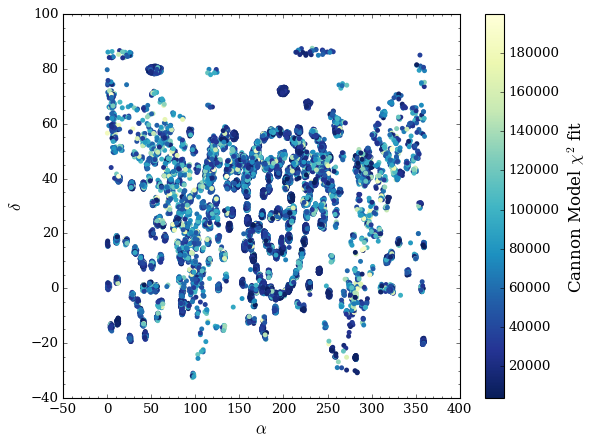

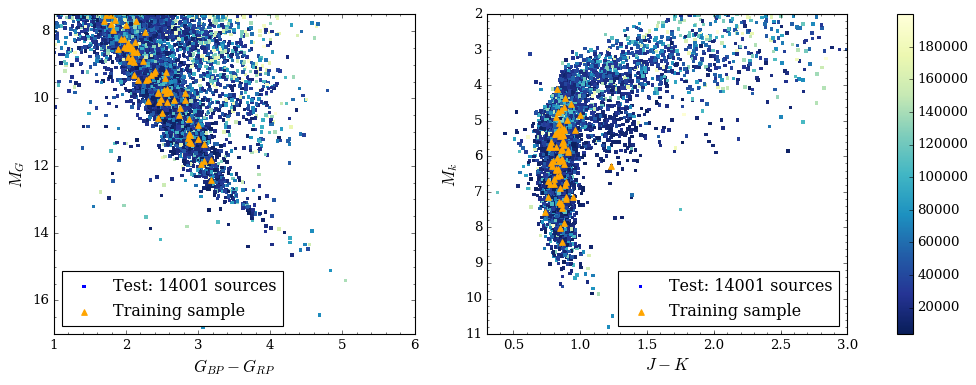

In [740]:
pl = plt.scatter(test['RA'], test['DEC'], c=test['CHI'], cmap='YlGnBu_r', edgecolor='none')
plt.xlabel(r'$\alpha$', fontsize=15)
plt.ylabel(r'$\delta$', fontsize=15)
cb = plt.colorbar(pl)
cb.set_label(r'Cannon Model $\chi^2$ fit', fontsize=15)
plt.minorticks_on()
plt.show()

#=====

fig, (ax1, ax2) = plt.subplots(1,2, figsize=[16,5])
ax1.scatter(test['BP_RP'], test['G_ABS'], c=test['CHI'], cmap='YlGnBu_r', edgecolor='none', s=10, marker='s', \
                 label='Test: %s sources'%(len(test)))
ax1.scatter(mann['BP_RP'], mann['G_ABS'], color='orange', marker='^', label='Training sample', s=25)
ax1.set_xlabel(r'$G_{BP} - G_{RP}$', fontsize=15)
ax1.set_ylabel(r'$M_{G}$', fontsize=15)
ax1.set_ylim(17,7.5)
ax1.set_xlim(1,6)
ax1.legend(loc='lower left', scatterpoints=1)
ax1.minorticks_on()

pl = plt.scatter(test['J_K'], test['K_ABS'], c=test['CHI'], cmap='YlGnBu_r', edgecolor='none', s=10, marker='s', \
                 label='Test: %s sources'%(len(test)))
ax2.scatter(mann['J_K'], mann['K_ABS'], color='orange', marker='^', label='Training sample', s=25)
ax2.set_xlabel(r'$J-K$', fontsize=15)
ax2.set_ylabel(r'$M_{k}$', fontsize=15)
ax2.set_ylim(11,2)
ax2.set_xlim(.3,3)
ax2.legend(loc='lower right', scatterpoints=1)
ax2.minorticks_on()

cb = plt.colorbar(pl, ax=(ax1,ax2), orientation='vertical')
plt.show()

### J, K cmd selection

In [741]:
jk_cut = [.7, 1.1]
Mk_cut = [4.3, 9]

w, h = jk_cut[1] - jk_cut[0], Mk_cut[1] - Mk_cut[0]

jk_sel = test[test['J_K'] > jk_cut[0]][test['J_K'] < jk_cut[1]][test['K_ABS'] > Mk_cut[0]][test['K_ABS'] < Mk_cut[1]]
jk_rem = test.set_index('ID').subtract(jk_sel.set_index('ID'), fill_value=0)

/home/jess/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


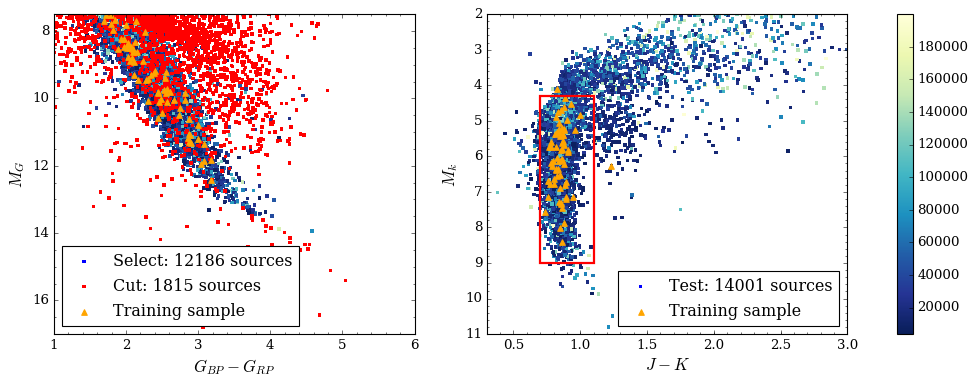

In [742]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=[16,5])

ax1.scatter(jk_sel['BP_RP'], jk_sel['G_ABS'], c=jk_sel['CHI'], cmap='YlGnBu_r', edgecolor='none', s=10, marker='s', \
                 label='Select: %s sources'%(len(jk_sel)))
ax1.scatter(jk_rem['BP_RP'], jk_rem['G_ABS'], color='r', edgecolor='none', s=10, marker='s', \
                 label='Cut: %s sources'%(str(len(test) - len(jk_sel))))
ax1.scatter(mann['BP_RP'], mann['G_ABS'], color='orange', marker='^', label='Training sample', s=25)
ax1.set_xlabel(r'$G_{BP} - G_{RP}$', fontsize=15)
ax1.set_ylabel(r'$M_{G}$', fontsize=15)
ax1.set_ylim(17,7.5)
ax1.set_xlim(1,6)
ax1.legend(loc='lower left', scatterpoints=1)
ax1.minorticks_on()

rect = plt.Rectangle((jk_cut[0], Mk_cut[0]), w, h, fill=False, color='r', linewidth=2)
ax2.add_patch(rect)
pl = plt.scatter(test['J_K'], test['K_ABS'], c=test['CHI'], cmap='YlGnBu_r', edgecolor='none', s=10, marker='s', \
                 label='Test: %s sources'%(len(test)))
ax2.scatter(mann['J_K'], mann['K_ABS'], color='orange', marker='^', label='Training sample', s=25)
ax2.set_xlabel(r'$J-K$', fontsize=15)
ax2.set_ylabel(r'$M_{k}$', fontsize=15)
ax2.set_ylim(11,2)
ax2.set_xlim(.3,3)
ax2.legend(loc='lower right', scatterpoints=1)
ax2.minorticks_on()

cb = plt.colorbar(pl, ax=(ax1,ax2), orientation='vertical')
plt.show()

In [743]:
test = jk_sel

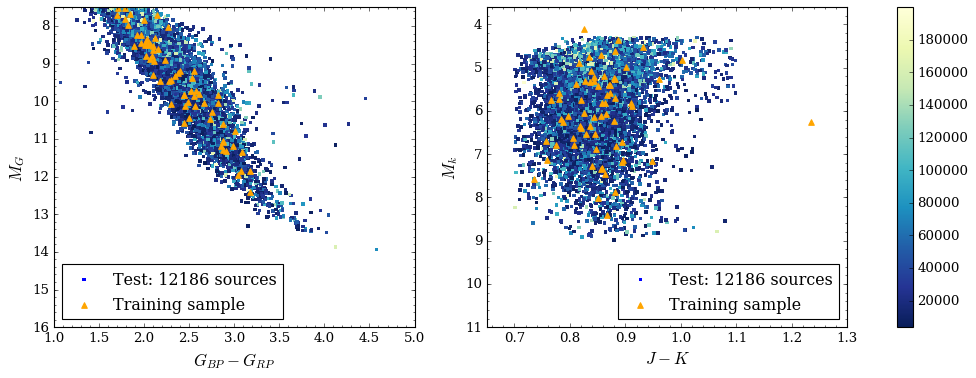

In [744]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=[16,5])

ax1.scatter(test['BP_RP'], test['G_ABS'], c=test['CHI'], cmap='YlGnBu_r', edgecolor='none', s=10, marker='s', \
                 label='Test: %s sources'%(len(test)))
ax1.scatter(mann['BP_RP'], mann['G_ABS'], color='orange', marker='^', label='Training sample', s=25)
ax1.set_xlabel(r'$G_{BP} - G_{RP}$', fontsize=15)
ax1.set_ylabel(r'$M_{G}$', fontsize=15)
ax1.set_ylim(16,7.5)
ax1.set_xlim(1,5)
ax1.legend(loc='lower left', scatterpoints=1)
ax1.minorticks_on()

pl = plt.scatter(test['J_K'], test['K_ABS'], c=test['CHI'], cmap='YlGnBu_r', edgecolor='none', s=10, marker='s', \
                 label='Test: %s sources'%(len(test)))
ax2.scatter(mann['J_K'], mann['K_ABS'], color='orange', marker='^', label='Training sample', s=25)
ax2.set_xlabel(r'$J-K$', fontsize=15)
ax2.set_ylabel(r'$M_{k}$', fontsize=15)
ax2.set_ylim(11,3.6)
ax2.set_xlim(.65,1.3)
ax2.legend(loc='lower right', scatterpoints=1)
ax2.minorticks_on()

cb = plt.colorbar(pl, ax=(ax1,ax2), orientation='vertical')
plt.show()

### BP, RP cmd selection

In [745]:
p = [[1.4, 7.5], [2.2, 7.5], [4.2, 14], [3.3, 14]]
slope = [(p[3][1] - p[0][1])/(p[3][0] - p[0][0]), (p[2][1] - p[1][1])/(p[2][0] - p[1][0])]
inter = [p[0][1] - slopes[0]*p[0][0], p[1][1] - slopes[1]*p[1][0]]

test['line1'] = test['BP_RP']*slope[0] + inter[0]
test['line2'] = test['BP_RP']*slope[1] + inter[1]

line_sel = test.query('G_ABS < line1').query('G_ABS > line2')
line_rem = test.set_index('ID').subtract(line_sel.set_index('ID'), fill_value=0)

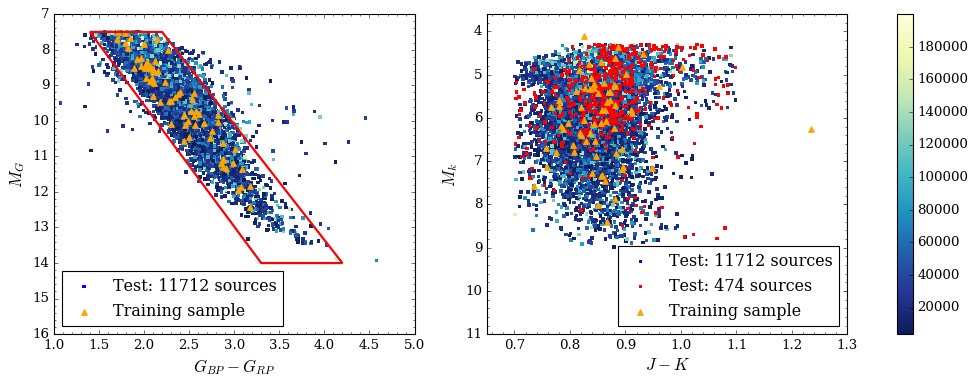

In [746]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=[16,5])

polygon = plt.Polygon(p, fill=False, color='r', linewidth=2)
ax1.add_patch(polygon)
ax1.scatter(test['BP_RP'], test['G_ABS'], c=test['CHI'], cmap='YlGnBu_r', edgecolor='none', s=10, marker='s', \
                 label='Test: %s sources'%(len(line_sel)))
ax1.scatter(mann['BP_RP'], mann['G_ABS'], color='orange', marker='^', label='Training sample', s=25)
ax1.set_xlabel(r'$G_{BP} - G_{RP}$', fontsize=15)
ax1.set_ylabel(r'$M_{G}$', fontsize=15)
ax1.set_ylim(16,7)
ax1.set_xlim(1,5)
ax1.legend(loc='lower left', scatterpoints=1)
ax1.minorticks_on()

pl = ax2.scatter(line_sel['J_K'], line_sel['K_ABS'], c=line_sel['CHI'], cmap='YlGnBu_r', edgecolor='none', s=10, marker='s', \
                 label='Test: %s sources'%(len(line_sel)))
ax2.scatter(line_rem['J_K'], line_rem['K_ABS'], color='r', edgecolor='none', s=10, marker='s', \
                 label='Test: %s sources'%(len(test)-len(line_sel)))
ax2.scatter(mann['J_K'], mann['K_ABS'], color='orange', marker='^', label='Training sample', s=25)
ax2.set_xlabel(r'$J-K$', fontsize=15)
ax2.set_ylabel(r'$M_{k}$', fontsize=15)
ax2.set_ylim(11,3.6)
ax2.set_xlim(.65,1.3)
ax2.legend(loc='lower right', scatterpoints=1)
ax2.minorticks_on()

cb = plt.colorbar(pl, ax=(ax1,ax2), orientation='vertical')
plt.show()

In [747]:
test = line_sel

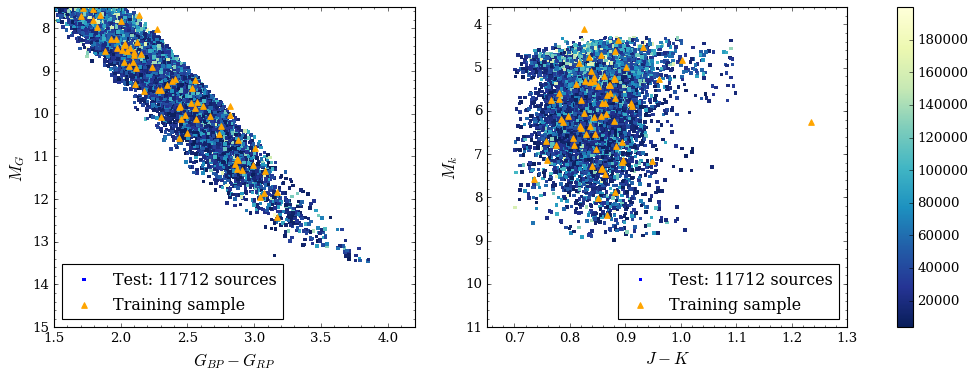

In [748]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=[16,5])

ax1.scatter(test['BP_RP'], test['G_ABS'], c=test['CHI'], cmap='YlGnBu_r', edgecolor='none', s=10, marker='s', \
                 label='Test: %s sources'%(len(test)))
ax1.scatter(mann['BP_RP'], mann['G_ABS'], color='orange', marker='^', label='Training sample', s=25)
ax1.set_xlabel(r'$G_{BP} - G_{RP}$', fontsize=15)
ax1.set_ylabel(r'$M_{G}$', fontsize=15)
ax1.set_ylim(15,7.5)
ax1.set_xlim(1.5,4.2)
ax1.legend(loc='lower left', scatterpoints=1)
ax1.minorticks_on()

pl = plt.scatter(test['J_K'], test['K_ABS'], c=test['CHI'], cmap='YlGnBu_r', edgecolor='none', s=10, marker='s', \
                 label='Test: %s sources'%(len(test)))
ax2.scatter(mann['J_K'], mann['K_ABS'], color='orange', marker='^', label='Training sample', s=25)
ax2.set_xlabel(r'$J-K$', fontsize=15)
ax2.set_ylabel(r'$M_{k}$', fontsize=15)
ax2.set_ylim(11,3.6)
ax2.set_xlim(.65,1.3)
ax2.legend(loc='lower right', scatterpoints=1)
ax2.minorticks_on()

cb = plt.colorbar(pl, ax=(ax1,ax2), orientation='vertical')
plt.show()

### Cut sources with Teff and [Fe/H] outside the training sample range

In [749]:
teff_rng = [2850, 4150] # [2859.0, 4131.0] 
fe_h_rng = [-0.5, 0.5] # [-0.48, 0.49]

train_sel = test[test['TEFF'] > teff_rng[0]][test['TEFF'] < teff_rng[1]][test['FE_H'] > fe_h_rng[0]][test['FE_H'] < fe_h_rng[1]]
train_cut = test.set_index('ID').subtract(train_sel.set_index('ID'), fill_value=0)

/home/jess/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.


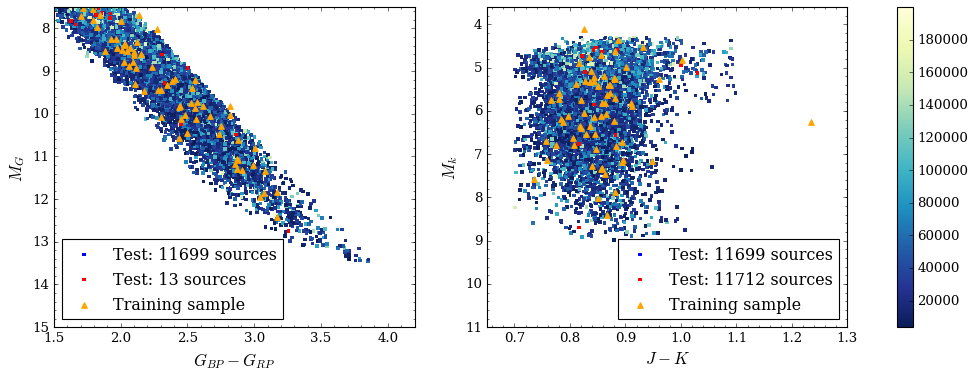

In [750]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=[16,5])

ax1.scatter(train_sel['BP_RP'], train_sel['G_ABS'], c=train_sel['CHI'], cmap='YlGnBu_r', edgecolor='none', s=10, marker='s', \
                 label='Test: %s sources'%(len(train_sel)))
ax1.scatter(train_cut['BP_RP'], train_cut['G_ABS'], c='r', edgecolor='none', s=10, marker='s', \
                 label='Test: %s sources'%(len(test)-len(train_sel)))
ax1.scatter(mann['BP_RP'], mann['G_ABS'], color='orange', marker='^', label='Training sample', s=25)
ax1.set_xlabel(r'$G_{BP} - G_{RP}$', fontsize=15)
ax1.set_ylabel(r'$M_{G}$', fontsize=15)
ax1.set_ylim(15,7.5)
ax1.set_xlim(1.5,4.2)
ax1.legend(loc='lower left', scatterpoints=1)
ax1.minorticks_on()

pl = ax2.scatter(train_sel['J_K'], train_sel['K_ABS'], c=train_sel['CHI'], cmap='YlGnBu_r', edgecolor='none', s=10, marker='s', \
                 label='Test: %s sources'%(len(train_sel)))
ax2.scatter(train_cut['J_K'], train_cut['K_ABS'], c='r', edgecolor='none', s=10, marker='s', \
                 label='Test: %s sources'%(len(train_cut)))
ax2.scatter(mann['J_K'], mann['K_ABS'], color='orange', marker='^', label='Training sample', s=25)
ax2.set_xlabel(r'$J-K$', fontsize=15)
ax2.set_ylabel(r'$M_{k}$', fontsize=15)
ax2.set_ylim(11,3.6)
ax2.set_xlim(.65,1.3)
ax2.legend(loc='lower right', scatterpoints=1)
ax2.minorticks_on()

cb = plt.colorbar(pl, ax=(ax1,ax2), orientation='vertical')
plt.show()

In [751]:
test = train_sel

### Final selection plots

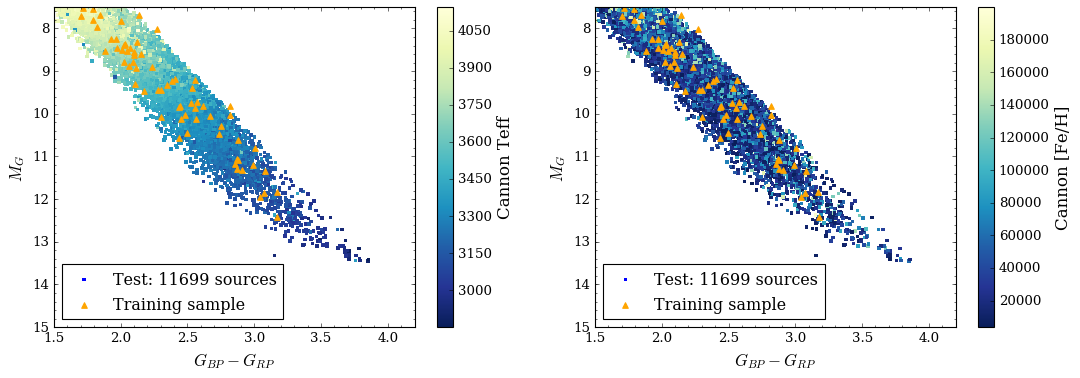

In [770]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=[16,5])

pl1 = ax1.scatter(test['BP_RP'], test['G_ABS'], c=test['TEFF'], cmap='YlGnBu_r', edgecolor='none', s=10, marker='s', \
                 label='Test: %s sources'%(len(test)))
ax1.scatter(mann['BP_RP'], mann['G_ABS'], color='orange', marker='^', label='Training sample', s=25)
ax1.set_xlabel(r'$G_{BP} - G_{RP}$', fontsize=15)
ax1.set_ylabel(r'$M_{G}$', fontsize=15)
ax1.set_ylim(15,7.5)
ax1.set_xlim(1.5,4.2)
ax1.legend(loc='lower left', scatterpoints=1)
ax1.minorticks_on()

pl2 = plt.scatter(test['BP_RP'], test['G_ABS'], c=test['CHI'], cmap='YlGnBu_r', edgecolor='none', s=10, marker='s', \
                 label='Test: %s sources'%(len(test)))
ax2.scatter(mann['BP_RP'], mann['G_ABS'], color='orange', marker='^', label='Training sample', s=25)
ax2.set_xlabel(r'$G_{BP} - G_{RP}$', fontsize=15)
ax2.set_ylabel(r'$M_{G}$', fontsize=15)
ax2.set_ylim(15,7.5)
ax2.set_xlim(1.5,4.2)
ax2.legend(loc='lower left', scatterpoints=1)
ax2.minorticks_on()

cb1 = plt.colorbar(pl1, ax=ax1, orientation='vertical')
cb1.set_label(r'Cannon Teff', fontsize=15)
cb2 = plt.colorbar(pl2, ax=ax2, orientation='vertical')
cb2.set_label(r'Cannon [Fe/H]', fontsize=15)
plt.show()

### Validation by color-temperature relations & comparison to ASPCAP

In [753]:
# Load APASS DR9 cross match
apass = pd.read_csv('/home/jess/Desktop/Research/Mdwarf_project/cannon_runs/apogee_test/test_results/test_mann_x_APASS.csv')
apass = pd.DataFrame(data={'ID':apass['ID'], 'Vmag':apass['Vmag']})
apass_match = pd.merge(apass, test, on='ID')
len(apass_match['ID'])

7383

In [754]:
# Get ASPCAP measurements for the cross match
AP_ID = np.array(allstar[1].data['APOGEE_ID'], dtype=str)
id_ind = np.array([np.where(AP_ID == ID)[0][0] for ID in apass_match['ID']])
print(len(AP_ID), len(id_ind), len(apass_match['ID']))

AP_FPARAM = np.array(allstar[1].data['FPARAM'])[id_ind]
apass_match['AP_TEFF'] = AP_FPARAM.T[0]
apass_match['AP_FE_H'] = AP_FPARAM.T[3]

apass_match['AP_TEFF'][apass_match['AP_TEFF'] < 0] = np.nan
apass_match['AP_FE_H'][apass_match['AP_FE_H'] < -10] = np.nan

277371 7383 7383


/home/jess/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.
/home/jess/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()


In [755]:
apass_match.keys()

Index(['ID', 'Vmag', 'Unnamed: 0', 'BP_RP', 'CHI', 'DEC', 'DIST', 'FE_H',
       'G_ABS', 'H', 'J', 'K', 'PLX', 'PLX_ERR', 'RA', 'TEFF', 'X', 'Y', 'Z',
       'K_ABS', 'J_K', 'line1', 'line2', 'AP_TEFF', 'AP_FE_H'],
      dtype='object')

In [756]:
v_j = np.array(apass_match['Vmag'] - apass_match['J'])
v_k = np.array(apass_match['Vmag'] - apass_match['K'])

# Mann relations
vj_teff = 3500*(2.515 - 1.054*v_j + 0.2965*(v_j)**2 - 0.04150*(v_j)**3 + 0.002245*(v_j)**4 + 0.05262*apass_match['FE_H'])
vj_diff = apass_match['TEFF'] - vj_teff

vj_teff_ap = 3500*(2.515 - 1.054*v_j + 0.2965*(v_j)**2 - 0.04150*(v_j)**3 + 0.002245*(v_j)**4 + 0.05262*apass_match['AP_FE_H'])
vj_diff_ap = apass_match['AP_TEFF'] - vj_teff_ap

# Casagrande relation
vk_teff = 5040/(-0.4809 + 0.8009*v_k - 0.1039*(v_k)**2 + 0.0056*(v_k)**3)
vk_diff = apass_match['TEFF'] - vk_teff
vk_diff_ap = apass_match['AP_TEFF'] - vk_teff

# Boyajian relation
vk_teff2 = 8984 - 2914*v_k + 588*(v_k)**2 - 47.4*(v_k)**3
vk_diff2 = apass_match['TEFF'] - vk_teff2
vk_diff_ap2 = apass_match['AP_TEFF'] - vk_teff2

x = np.linspace(2000,5000)

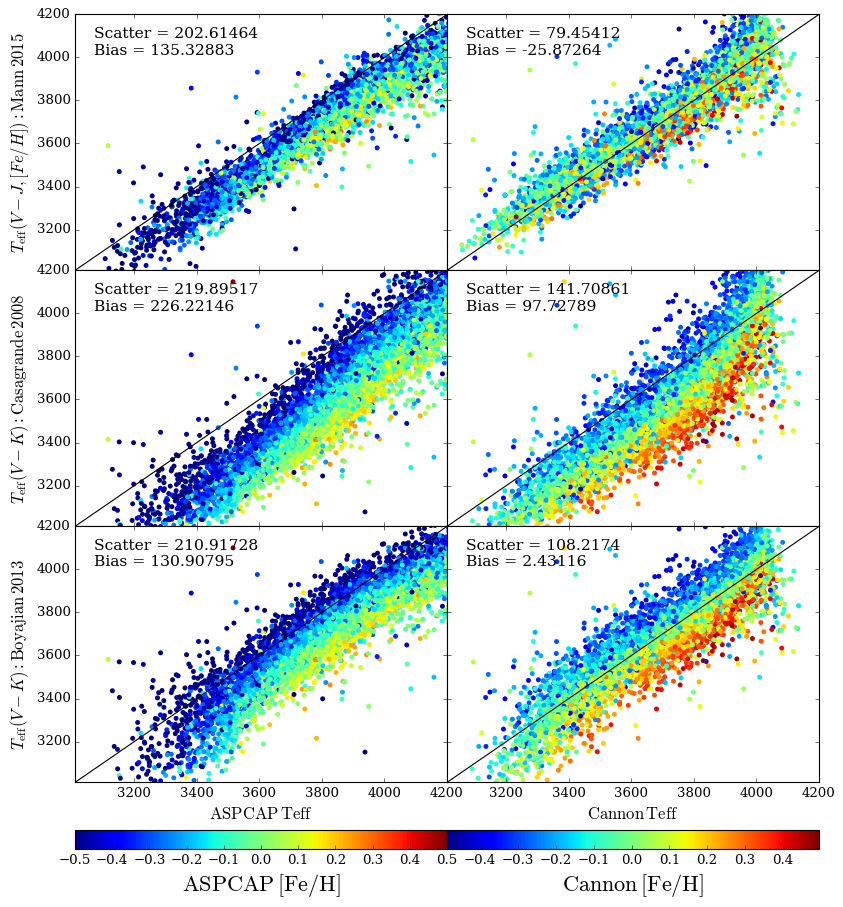

In [757]:
text1 = 'Scatter = %s \nBias = %s'%(round(np.std(vj_diff_ap),5), round(np.mean(vj_diff_ap),5))
text2 = 'Scatter = %s \nBias = %s'%(round(np.std(vj_diff),5), round(np.mean(vj_diff),5))
text3 = 'Scatter = %s \nBias = %s'%(round(np.std(vk_diff_ap),5), round(np.mean(vk_diff_ap),5))
text4 = 'Scatter = %s \nBias = %s'%(round(np.std(vk_diff),5), round(np.mean(vk_diff),5))
text5 = 'Scatter = %s \nBias = %s'%(round(np.std(vk_diff_ap2),5), round(np.mean(vk_diff_ap2),5))
text6 = 'Scatter = %s \nBias = %s'%(round(np.std(vk_diff2),5), round(np.mean(vk_diff2),5))

fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6)) = plt.subplots(3,2, figsize=[12,15], sharex=True, sharey=True)
fig.subplots_adjust(hspace=0, wspace=0)

ax1.plot(x,x, color='k')
ax1.text(0.05, 0.95, text1, fontsize=14, transform=ax1.transAxes, verticalalignment='top')
im1 = ax1.scatter(apass_match['AP_TEFF'], vj_teff_ap, edgecolor='none', c=np.clip(apass_match['AP_FE_H'],-.5,.5))
ax1.set_xlim(3010,4200)
ax1.set_ylim(3010,4200)
ax1.set_ylabel(r'$T_{\rm eff}(V-J, [Fe/H]): {\rm Mann \, 2015}$', fontsize=15)

ax2.plot(x,x, color='k')
ax2.text(0.05, 0.95, text2, fontsize=14, transform=ax2.transAxes, verticalalignment='top')
im2 = ax2.scatter(apass_match['TEFF'], vj_teff, edgecolor='none', c=apass_match['FE_H'])

#===========
ax3.plot(x,x, color='k')
ax3.text(0.05, 0.95, text3, fontsize=14, transform=ax3.transAxes, verticalalignment='top')
ax3.scatter(apass_match['AP_TEFF'], vk_teff, edgecolor='none', c=np.clip(apass_match['AP_FE_H'],-.5,.5))
ax3.set_ylabel(r'$T_{\rm eff}(V-K): {\rm Casagrande \, 2008}$', fontsize=15)

ax4.plot(x,x, color='k')
ax4.text(0.05, 0.95, text4, fontsize=14, transform=ax4.transAxes, verticalalignment='top')
ax4.scatter(apass_match['TEFF'], vk_teff, edgecolor='none', c=apass_match['FE_H'])

#===========
ax5.plot(x,x, color='k')
ax5.text(0.05, 0.95, text5, fontsize=14, transform=ax5.transAxes, verticalalignment='top')
ax5.scatter(apass_match['AP_TEFF'], vk_teff2, edgecolor='none', c=np.clip(apass_match['AP_FE_H'],-.5,.5))
ax5.set_ylabel(r'$T_{\rm eff}(V-K): {\rm Boyajian \, 2013}$', fontsize=15)

ax6.plot(x,x, color='k')
ax6.text(0.05, 0.95, text6, fontsize=14, transform=ax6.transAxes, verticalalignment='top')
ax6.scatter(apass_match['TEFF'], vk_teff2, edgecolor='none', c=apass_match['FE_H'])

ax5.set_xlabel(r'$\rm ASPCAP \, Teff$', fontsize=15)
ax6.set_xlabel(r'$\rm Cannon \, Teff$', fontsize=15)

#===========
# plt.tight_layout()
cb1 = fig.colorbar(im1, ax=(ax1, ax3, ax5), orientation='horizontal', pad=.05)
cb1.set_label(r'${\rm ASPCAP \, [Fe/H]}$', fontsize=20)

cb2 = fig.colorbar(im2, ax=(ax2, ax4, ax6), orientation='horizontal', pad=.05)
cb2.set_label(r'${\rm Cannon \, [Fe/H]}$', fontsize=20)
plt.show()

In [758]:
# Get ASPCAP measurements for the cross match
AP_ID = np.array(allstar[1].data['APOGEE_ID'], dtype=str)
id_ind = np.array([np.where(AP_ID == ID)[0][0] for ID in test['ID']])
print(len(AP_ID), len(id_ind), len(test['ID']))

AP_FPARAM = np.array(allstar[1].data['FPARAM'])[id_ind]
test['AP_TEFF'] = AP_FPARAM.T[0]
test['AP_FE_H'] = AP_FPARAM.T[3]

test['AP_TEFF'][test['AP_TEFF'] < 0] = np.nan
test['AP_FE_H'][test['AP_FE_H'] < -10] = np.nan

277371 11699 11699


/home/jess/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.
/home/jess/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()


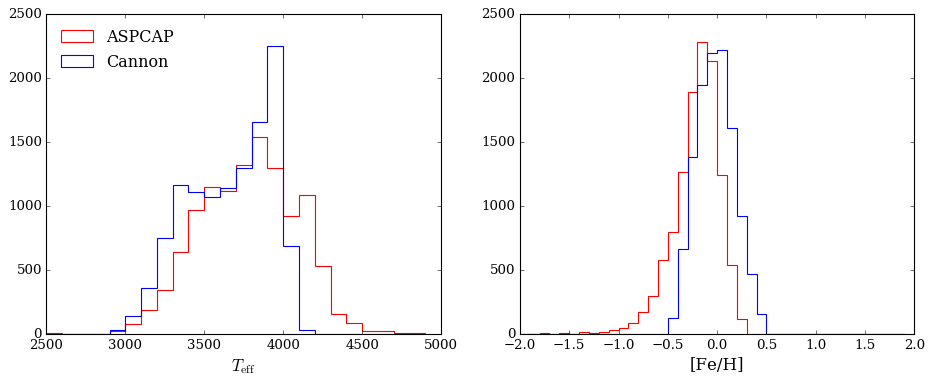

(11635, 11699)

In [759]:
bin1 = np.arange(2500, 5000, 100)
bin2 = np.arange(-2, 2, .1)

fig, (ax1, ax2) = plt.subplots(1,2, figsize=[14,5])

ax1.hist(test['AP_TEFF'][~np.isnan(test['AP_TEFF'])], bins=bin1, histtype='step', color='r', label='ASPCAP')
ax1.hist(test['TEFF'], bins=bin1, histtype='step', color='b', label='Cannon')
ax1.set_xlabel(r'$T_{\rm eff}$', fontsize=15)

ax2.hist(test['AP_FE_H'][~np.isnan(test['AP_FE_H'])], bins=bin2, histtype='step', color='r', label='ASPCAP')
ax2.hist(test['FE_H'], bins=bin2, histtype='step', color='b', label='Cannon')
ax2.set_xlabel(r'[Fe/H]', fontsize=15)

ax1.legend(loc='upper left', frameon=False)
plt.show()

len(test['AP_TEFF'][~np.isnan(test['AP_TEFF'])]), len(test)

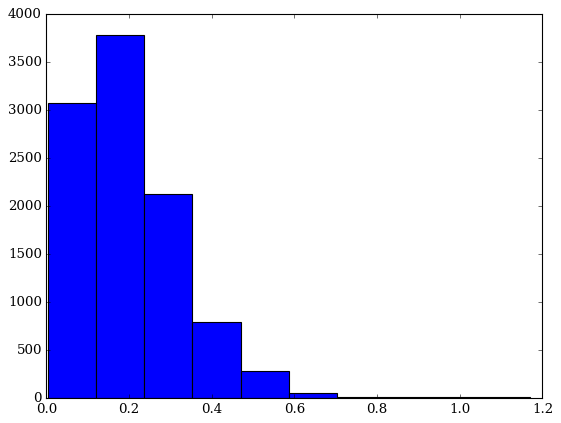

In [715]:
plt.hist(test['DIST'])
plt.show()

In [717]:
len(AP_ID)

277371

In [760]:
list(test.keys())

['Unnamed: 0',
 'BP_RP',
 'CHI',
 'DEC',
 'DIST',
 'FE_H',
 'G_ABS',
 'H',
 'ID',
 'J',
 'K',
 'PLX',
 'PLX_ERR',
 'RA',
 'TEFF',
 'X',
 'Y',
 'Z',
 'K_ABS',
 'J_K',
 'line1',
 'line2',
 'AP_TEFF',
 'AP_FE_H']